In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
def process_file(fname):
    f = open(fname, 'r')
    lines = f.readlines()

    n = len(lines)
  
    nproc = [np.zeros(int(n/10))] * 10
    wct = [np.zeros(int(n/10))] * 10
    wct_exec = [np.zeros(int(n/10))] * 10
    speedup = [np.zeros(int(n/10))] * 10
    speedup_exec = [np.zeros(int(n/10))] * 10
    
    ji = [0] * 10
    
    for l in lines:
        l = l.split()
        j = int(l[-1])
        
        nproc[j][ji[j]] = int(l[3])
        wct[j][ji[j]] = float(l[6])
        wct_exec[j][ji[j]] = float(l[7][1:])
        ji[j] += 1

    for j in range(10):
        args = np.argsort(nproc[j])
        nproc[j] = nproc[j][args]
        wct[j] = wct[j][args]
        wct_exec[j] = wct_exec[j][args]
        
    wct0 = min(wct[j][0] for j in range(10))
    wct_exec0 = min(wct_exec[j][0] for j in range(10))
    
    for j in range(10):
        speedup[j] = wct0 / wct[j] * nproc[0][0]
        speedup_exec[j] = wct_exec0 / wct_exec[j] * nproc[0][0]
    
    print("Time for %d proc: %f" % (nproc[0][0], wct0))
    return nproc, speedup, speedup_exec

Time for 1 proc: 5815.960000


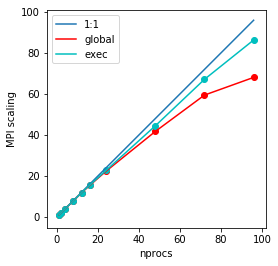

In [3]:
def plot_scaling():
    nproc, speedup, speedup_exec = process_file('stommel_mpi_scaling_long_5e4_50years.log')
    
    
    plt.plot([1,nproc[0][-1]], [1,nproc[0][-1]]);
    plt.xlabel('nprocs');
    plt.ylabel('MPI scaling');
    
    for j in range(1):
        plt.plot(nproc[j], speedup[j], 'r');
        plt.scatter(nproc[j], speedup[j], c='r');
        plt.plot(nproc[j], speedup_exec[j], 'c');
        plt.scatter(nproc[j], speedup_exec[j], c='c');

    plt.xlim(1, nproc[0][-1]);
    plt.ylim(1, nproc[0][-1]);
    plt.axis('scaled');

    plt.legend(['1:1', 'global', 'exec']);


plot_scaling()
    

Time for 1 proc: 5815.960000
Time for 12 proc: 9943.530000


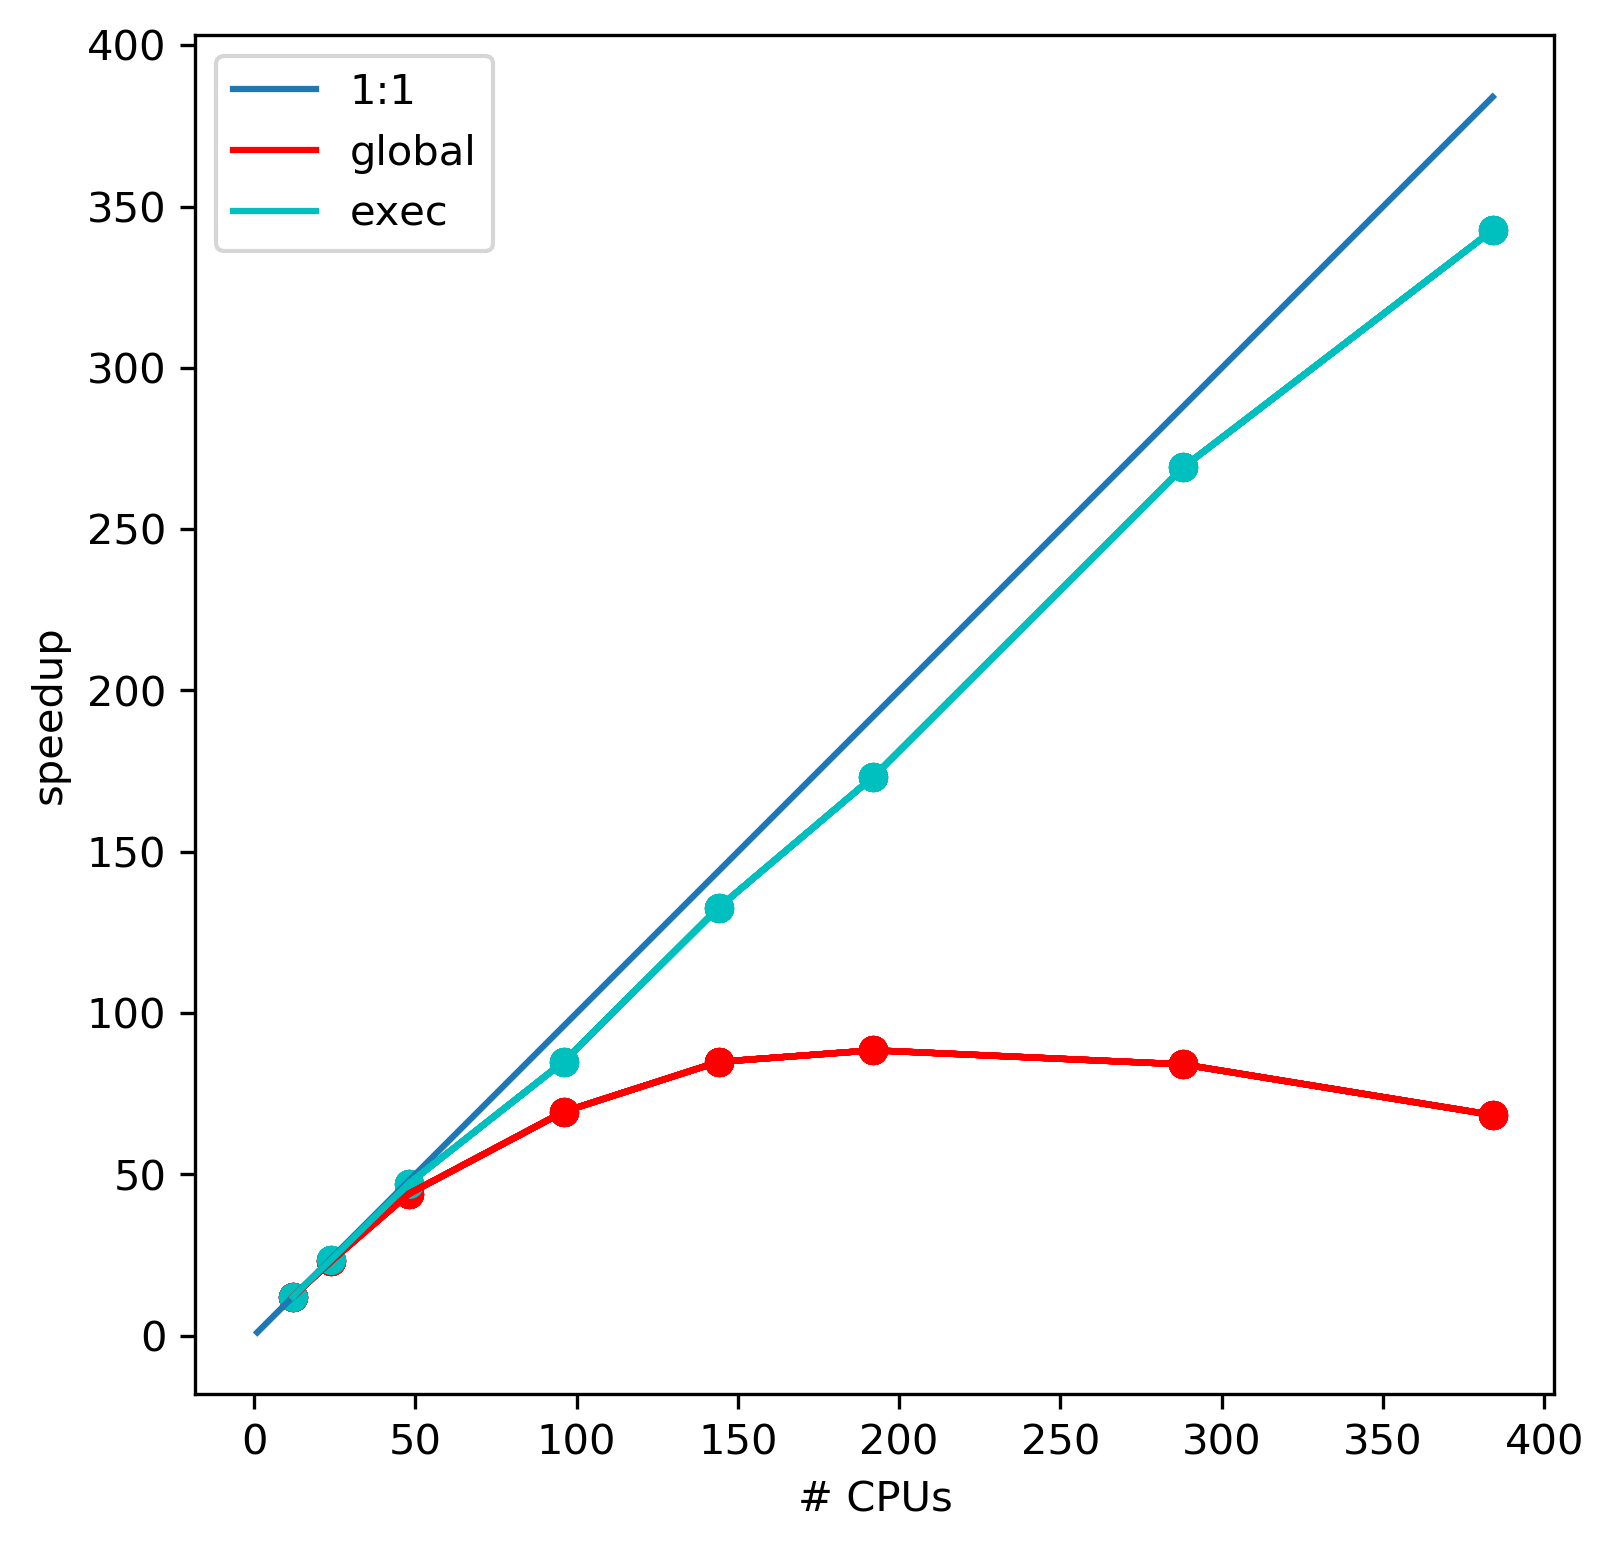

In [4]:
def plot_scaling():
    nproc1, speedup1, speedup_exec1 = process_file('stommel_mpi_scaling_long_5e4_50years.log')
    nproc2, speedup2, speedup_exec2 = process_file('stommel_mpi_scaling_long_1e6_50years.log')
    
    fig = plt.figure(figsize=(6, 6), dpi=300, facecolor='w', edgecolor='k')
    plt.plot([1,nproc2[0][-1]], [1,nproc2[0][-1]]);
    plt.xlabel('# CPUs');
    plt.ylabel('speedup');
    
    plt.xlim(1, nproc2[0][-1]);
    plt.ylim(1, nproc2[0][-1]);
    plt.axis('scaled');
    
    for nproc, speedup, speedup_exec in zip([nproc2, nproc1],
                                             [speedup2, speedup1],
                                             [speedup_exec2, speedup_exec1]):  
        
        for j in range(10):
            plt.plot(nproc[j], speedup[j], 'r');
            plt.scatter(nproc[j], speedup[j], c='r');
            plt.plot(nproc[j], speedup_exec[j], 'c');
            plt.scatter(nproc[j], speedup_exec[j], c='c');


        plt.legend(['1:1', 'global', 'exec']);
        break

        
    plt.savefig('mpi_stommel_scaling_1e6_50years.png');



plot_scaling();